### load libraries

In [1]:
import numpy as np
from numpy.linalg import norm
import pandas as pd
import matplotlib.pyplot as plt

### import the data we gathered from MSD Taste Profiles and Spotify Web API

In [2]:
msd_spot_df = pd.read_csv('taste_profiles_spotify.csv', index_col=0, header=0, dtype={'userID': str, 'songID': str, 
    'playcount': int, 'trackID': str, 'artist': str, 'title': str, 'trackID_spot': str, 'artistID_spot': str,
    'artistGenres': str, 'artistPop': int, 'trackPop': int, 'trackAcoustic': float, 'trackDanceable': float,
    'trackDurMS': int, 'trackEnergy': float, 'trackInstrum': float, 'trackKey': int, 'trackLoud': float, 'trackMode': int,
    'trackSpeech': float, 'trackTempo': float, 'trackVal': float, 'albumYear': int})

msd_spot_df

,userID,songID,playcount,trackID,artist,title,trackID_spot,artistID_spot,artistGenres,artistPop,...,trackDurMS,trackEnergy,trackInstrum,trackKey,trackLoud,trackMode,trackSpeech,trackTempo,trackVal,albumYear
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1,TRIRLYL128F42539D1,Billy Preston,Nothing from Nothing,72PoJMDfdaw9gGECgA9kTZ,0IecGJbdBeYSOVtSPRehh5,"classic soul, funk, psychedelic soul, quiet st...",53,...,156200,0.830,0.011200,9,-3.995,0,0.0283,102.800,0.909,1974
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,TRMHBXZ128F4238406,Paco De Lucia,Entre Dos Aguas,5hVqZ5hnvQGT4LOpUVuJUa,3h8OjAdgYXVRoMZ8jFd6Uw,"flamenco, flamenco guitar, rumba",55,...,360426,0.654,0.874000,4,-12.673,0,0.0349,102.814,0.924,1997
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1,TRYQMNI128F147C1C7,Josh Rouse,Under Cold Blue Stars,4HWqzvmeiaddzCDkSQcNxf,38euc5ce2q2MMzaoJcPstz,alternative country,44,...,196333,0.692,0.000008,1,-6.880,1,0.0266,100.614,0.523,2002
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBSUJE12A6D4F8CF5,2,TRPLAXZ128F4292406,Jorge Drexler,12 segundos de oscuridad,5GCB9mqJzKN4kDKvmqQ03X,4ssUf5gLb1GBLxi1BhPrVt,"cantautor, latin afrobeat, latin alternative, ...",68,...,164946,0.423,0.001160,7,-9.239,1,0.0302,78.005,0.507,2006
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,TRHNCIR128F42334A5,Kanye West,Stronger,0j2T0R9dR9qdJYsB7ciXhf,5K4W6rqBFWDnAN6FQUkS6x,"chicago rap, rap",92,...,311866,0.717,0.000000,10,-7.858,0,0.1530,103.992,0.490,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10633750,cf8289419383259189afe6bb50c5115fd84f1064,SOHKQSO12A8AE47C9C,10,TRPLVWY12903CC08D3,Everything But The Girl,Time After Time,5RxNm1sQygVKpY9hEOvid5,13ccXrK7AmXb4TddMkE7jy,"electronica, new wave pop, pop rock, sophisti-...",60,...,269360,0.203,0.000006,0,-13.612,1,0.0323,120.370,0.326,1992
10633751,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOABJBU12A8C13F63F,2,TRUDZCV128F42811F6,Cage The Elephant,Back Against The Wall,0vz64VTiPPBpcmla0QvAI9,26T3LtbuGT1Fu9m0eRq5X3,"modern rock, punk blues, rock",75,...,228320,0.743,0.000000,1,-6.163,1,0.0305,110.334,0.534,2009
10633752,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOEISDE12A8AE4632E,1,TRKIBVN128F42283F4,King Kobra,Only The Strong Will Survive,5sUy4vaMwn4YCMPlr0RW0g,60DhbkIV5C2aLGgtpfUw2C,"glam metal, hard rock, sleaze rock",36,...,240372,0.853,0.000000,4,-4.691,1,0.0328,91.632,0.550,1986
10633753,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOHHKGO12AC3DF57BF,1,TRODVNR12903CE6C50,Close Your Eyes,17:20,0IUhBvxsm2pLz6rzEM3YUn,4EJdKdDfQ0XQ4YBhh12xZe,christian hardcore,34,...,136920,0.899,0.089900,11,-4.449,1,0.1680,186.031,0.775,2010


### turn "playcount" into a binary outcome: preferred vs. not preferred

In [3]:
grouped = msd_spot_df.groupby(["userID"]).mean()

C:\Users\sophi\AppData\Local\Temp\ipykernel_3268\2452084082.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = msd_spot_df.groupby(["userID"]).mean()


In [4]:
grouped.reset_index(inplace=True)
grouped

,userID,playcount,artistPop,trackPop,trackAcoustic,trackDanceable,trackDurMS,trackEnergy,trackInstrum,trackKey,trackLoud,trackMode,trackSpeech,trackTempo,trackVal,albumYear
0,00001638d6189236866af9bbf309ae6c2347ffdc,2.500000,63.500000,33.000000,0.547575,0.493000,285256.250000,0.493650,0.001969,3.750000,-10.885750,1.000000,0.067100,125.396250,0.423400,2009.250000
1,0000175652312d12576d9e6b84f600caa24c4715,1.000000,53.000000,29.400000,0.181656,0.596600,286822.800000,0.826600,0.160806,5.000000,-6.492200,0.800000,0.053780,137.183800,0.626400,2001.000000
2,00003a4459f33b92906be11abe0e93efc423c0ff,1.666667,20.333333,11.333333,0.311833,0.485667,239213.000000,0.451000,0.593133,6.333333,-15.645667,0.666667,0.047600,94.348333,0.107467,2005.333333
3,00004fb90a86beb8bed1e9e328f5d9b6ee7dc03e,1.500000,77.500000,40.666667,0.096694,0.412917,244395.083333,0.814417,0.038729,5.250000,-5.675000,0.750000,0.068517,125.641083,0.382417,2007.416667
4,000060ca4e6bea0a5c9037fc1bbd7bbabb98c754,2.000000,32.750000,19.000000,0.021932,0.507750,254516.250000,0.882000,0.232408,5.500000,-6.747250,1.000000,0.052375,136.035500,0.540500,1996.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882475,ffffdc274ca76d154b4e56b2dbc82ff538c93c0b,1.333333,59.666667,38.000000,0.195620,0.590000,217506.500000,0.697333,0.057100,4.333333,-7.302000,0.666667,0.046533,122.707167,0.588833,1992.666667
882476,ffffdc6c89988cd6119067769162948eacf8b670,4.714286,68.285714,47.000000,0.097924,0.533571,257490.857143,0.788714,0.010818,4.142857,-5.777571,0.571429,0.044557,115.878143,0.328429,2008.142857
882477,fffff3e690fcda840b716ce7249d8935ff3323fc,2.250000,59.500000,32.250000,0.272729,0.584250,279796.250000,0.470250,0.000118,5.750000,-11.258500,0.500000,0.093175,133.227750,0.545850,1992.750000
882478,fffff67d54a40927c93d03bd6c816b034b59f087,1.550000,60.350000,22.350000,0.466541,0.460700,250300.550000,0.509470,0.195093,5.750000,-12.852800,0.750000,0.071025,128.900400,0.495750,1992.750000


In [6]:
grouped.drop(columns=['artistPop', 'trackPop', 'trackDurMS', 'trackKey', 'trackLoud', 'trackMode', 'trackTempo', 'albumYear'], inplace=True)
grouped.rename(columns={"playcount": "mean_playcount", "trackAcoustic": "c_acoust", "trackDanceable": "c_dance", "trackEnergy": "c_energy", "trackInstrum": "c_inst", "trackSpeech": "c_speech", "trackVal": "c_val"}, inplace=True)

grouped.head()

,userID,mean_playcount,c_acoust,c_dance,c_energy,c_inst,c_speech,c_val
0,00001638d6189236866af9bbf309ae6c2347ffdc,2.500000,0.547575,0.493000,0.493650,0.001969,0.067100,0.423400
1,0000175652312d12576d9e6b84f600caa24c4715,1.000000,0.181656,0.596600,0.826600,0.160806,0.053780,0.626400
2,00003a4459f33b92906be11abe0e93efc423c0ff,1.666667,0.311833,0.485667,0.451000,0.593133,0.047600,0.107467
3,00004fb90a86beb8bed1e9e328f5d9b6ee7dc03e,1.500000,0.096694,0.412917,0.814417,0.038729,0.068517,0.382417
4,000060ca4e6bea0a5c9037fc1bbd7bbabb98c754,2.000000,0.021932,0.507750,0.882000,0.232408,0.052375,0.540500


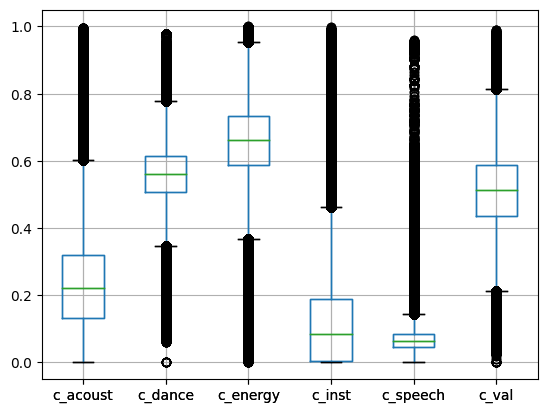

In [55]:
boxplot = grouped.boxplot(column=['c_acoust', 'c_dance', 'c_energy', 'c_inst', 'c_speech', 'c_val'])
plt.show()

In [7]:
merged = msd_spot_df.merge(grouped, how='left', on='userID')
merged.head()

,userID,songID,playcount,trackID,artist,title,trackID_spot,artistID_spot,artistGenres,artistPop,...,trackTempo,trackVal,albumYear,mean_playcount,c_acoust,c_dance,c_energy,c_inst,c_speech,c_val
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1,TRIRLYL128F42539D1,Billy Preston,Nothing from Nothing,72PoJMDfdaw9gGECgA9kTZ,0IecGJbdBeYSOVtSPRehh5,"classic soul, funk, psychedelic soul, quiet st...",53,...,102.800,0.909,1974,1.315789,0.401536,0.608421,0.635579,0.145652,0.050268,0.629632
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,TRMHBXZ128F4238406,Paco De Lucia,Entre Dos Aguas,5hVqZ5hnvQGT4LOpUVuJUa,3h8OjAdgYXVRoMZ8jFd6Uw,"flamenco, flamenco guitar, rumba",55,...,102.814,0.924,1997,1.315789,0.401536,0.608421,0.635579,0.145652,0.050268,0.629632
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1,TRYQMNI128F147C1C7,Josh Rouse,Under Cold Blue Stars,4HWqzvmeiaddzCDkSQcNxf,38euc5ce2q2MMzaoJcPstz,alternative country,44,...,100.614,0.523,2002,1.315789,0.401536,0.608421,0.635579,0.145652,0.050268,0.629632
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBSUJE12A6D4F8CF5,2,TRPLAXZ128F4292406,Jorge Drexler,12 segundos de oscuridad,5GCB9mqJzKN4kDKvmqQ03X,4ssUf5gLb1GBLxi1BhPrVt,"cantautor, latin afrobeat, latin alternative, ...",68,...,78.005,0.507,2006,1.315789,0.401536,0.608421,0.635579,0.145652,0.050268,0.629632
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,TRHNCIR128F42334A5,Kanye West,Stronger,0j2T0R9dR9qdJYsB7ciXhf,5K4W6rqBFWDnAN6FQUkS6x,"chicago rap, rap",92,...,103.992,0.490,2007,1.315789,0.401536,0.608421,0.635579,0.145652,0.050268,0.629632


In [8]:
print(len(msd_spot_df))
print(len(merged))

10633755
10633755


In [9]:
merged["Preferred"] = "" #will either be a 1 for YES or 0 for NO

#if user playcount for a song is over their mean, then label it preferred. Else not preferred.
merged['Preferred'] = np.where(merged.playcount >= merged.mean_playcount, '1', '0')

In [10]:
merged

,userID,songID,playcount,trackID,artist,title,trackID_spot,artistID_spot,artistGenres,artistPop,...,trackVal,albumYear,mean_playcount,c_acoust,c_dance,c_energy,c_inst,c_speech,c_val,Preferred
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1,TRIRLYL128F42539D1,Billy Preston,Nothing from Nothing,72PoJMDfdaw9gGECgA9kTZ,0IecGJbdBeYSOVtSPRehh5,"classic soul, funk, psychedelic soul, quiet st...",53,...,0.909,1974,1.315789,0.401536,0.608421,0.635579,0.145652,0.050268,0.629632,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,TRMHBXZ128F4238406,Paco De Lucia,Entre Dos Aguas,5hVqZ5hnvQGT4LOpUVuJUa,3h8OjAdgYXVRoMZ8jFd6Uw,"flamenco, flamenco guitar, rumba",55,...,0.924,1997,1.315789,0.401536,0.608421,0.635579,0.145652,0.050268,0.629632,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1,TRYQMNI128F147C1C7,Josh Rouse,Under Cold Blue Stars,4HWqzvmeiaddzCDkSQcNxf,38euc5ce2q2MMzaoJcPstz,alternative country,44,...,0.523,2002,1.315789,0.401536,0.608421,0.635579,0.145652,0.050268,0.629632,0
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBSUJE12A6D4F8CF5,2,TRPLAXZ128F4292406,Jorge Drexler,12 segundos de oscuridad,5GCB9mqJzKN4kDKvmqQ03X,4ssUf5gLb1GBLxi1BhPrVt,"cantautor, latin afrobeat, latin alternative, ...",68,...,0.507,2006,1.315789,0.401536,0.608421,0.635579,0.145652,0.050268,0.629632,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,TRHNCIR128F42334A5,Kanye West,Stronger,0j2T0R9dR9qdJYsB7ciXhf,5K4W6rqBFWDnAN6FQUkS6x,"chicago rap, rap",92,...,0.490,2007,1.315789,0.401536,0.608421,0.635579,0.145652,0.050268,0.629632,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10633750,cf8289419383259189afe6bb50c5115fd84f1064,SOHKQSO12A8AE47C9C,10,TRPLVWY12903CC08D3,Everything But The Girl,Time After Time,5RxNm1sQygVKpY9hEOvid5,13ccXrK7AmXb4TddMkE7jy,"electronica, new wave pop, pop rock, sophisti-...",60,...,0.326,1992,5.176471,0.322726,0.588647,0.595118,0.087951,0.063988,0.495118,1
10633751,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOABJBU12A8C13F63F,2,TRUDZCV128F42811F6,Cage The Elephant,Back Against The Wall,0vz64VTiPPBpcmla0QvAI9,26T3LtbuGT1Fu9m0eRq5X3,"modern rock, punk blues, rock",75,...,0.534,2009,1.250000,0.132412,0.463000,0.671750,0.022475,0.065475,0.585000,1
10633752,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOEISDE12A8AE4632E,1,TRKIBVN128F42283F4,King Kobra,Only The Strong Will Survive,5sUy4vaMwn4YCMPlr0RW0g,60DhbkIV5C2aLGgtpfUw2C,"glam metal, hard rock, sleaze rock",36,...,0.550,1986,1.250000,0.132412,0.463000,0.671750,0.022475,0.065475,0.585000,0
10633753,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOHHKGO12AC3DF57BF,1,TRODVNR12903CE6C50,Close Your Eyes,17:20,0IUhBvxsm2pLz6rzEM3YUn,4EJdKdDfQ0XQ4YBhh12xZe,christian hardcore,34,...,0.775,2010,1.250000,0.132412,0.463000,0.671750,0.022475,0.065475,0.585000,0


### what is the ratio of preferred to not preferred in the dataset?

We want the distribution of classes to be even.

In [11]:
print("Number of preferred observations: ", len(merged[merged["Preferred"]=='1']))
print("Number of not preferred observations: ", len(merged[merged["Preferred"]=='0']))

Number of preferred observations:  3380908
Number of not preferred observations:  7252847


Since there's about half as many preferred vs not preferred samples in our dataset, we will need to resample so that it's even.

### resampling

But before we do random sampling to even the classes, since we have a lot of data (more than we can reasonably load into the ML algorithm with the current hardware), lets only select the users which have the largest range in number of playcounts within their data.

Recall that we did some cleaning of this nature at an earlier stage of the project, to ensure that there was at least some variance in number of playcounts within each user. However we were not very strict with this thresholding. Given the low classification accuracy we have observed so far, perhaps this variance needs to be even greater in our data sample in order to achieve better results.

In [18]:
grouped_range = msd_spot_df.groupby(["userID"]).var()
grouped_range.reset_index(inplace=True)

grouped_range.drop(columns=['artistPop', 'trackPop', 'trackAcoustic', 'trackDanceable', 'trackDurMS', 'trackEnergy', 'trackInstrum', 'trackKey', 'trackLoud', 'trackMode', 'trackSpeech', 'trackTempo', 'trackVal', 'albumYear'], inplace=True)

grouped_range['toRemove'] = False #mark users to remove

grouped_range.head()

C:\Users\sophi\AppData\Local\Temp\ipykernel_3268\3184403036.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_range = msd_spot_df.groupby(["userID"]).var()


,userID,playcount,toRemove
0,00001638d6189236866af9bbf309ae6c2347ffdc,9.000000,False
1,0000175652312d12576d9e6b84f600caa24c4715,0.000000,False
2,00003a4459f33b92906be11abe0e93efc423c0ff,1.333333,False
3,00004fb90a86beb8bed1e9e328f5d9b6ee7dc03e,0.636364,False
4,000060ca4e6bea0a5c9037fc1bbd7bbabb98c754,4.000000,False


In [16]:
grouped_range['playcount'].describe()

count    8.410360e+05
mean     5.241256e+01
std      2.728943e+03
min      0.000000e+00
25%      5.535714e-01
50%      3.000000e+00
75%      1.250000e+01
max      2.071831e+06
Name: playcount, dtype: float64

In [39]:
grouped_range.loc[grouped_range['playcount'] < 2, 'toRemove'] = True
print(len(grouped_range[grouped_range['toRemove']==True]), "users marked to remove out of ", len(grouped_range))

353177 users marked to remove out of  882480


In [40]:
df = grouped_range[grouped_range['toRemove']==False]
df.reset_index(inplace=True, drop=True)
df.describe()

,playcount
count,4.878590e+05
mean,8.993366e+01
std,3.582598e+03
min,2.000000e+00
25%,4.166667e+00
50%,9.374269e+00
75%,3.026422e+01
max,2.071831e+06


In [41]:
grouped_range.drop(columns=['playcount'], inplace=True)

merged = merged.merge(grouped_range, how='left', on='userID')
merged.head()

,userID,songID,playcount,trackID,artist,title,trackID_spot,artistID_spot,artistGenres,artistPop,...,albumYear,mean_playcount,c_acoust,c_dance,c_energy,c_inst,c_speech,c_val,Preferred,toRemove
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1,TRIRLYL128F42539D1,Billy Preston,Nothing from Nothing,72PoJMDfdaw9gGECgA9kTZ,0IecGJbdBeYSOVtSPRehh5,"classic soul, funk, psychedelic soul, quiet st...",53,...,1974,1.315789,0.401536,0.608421,0.635579,0.145652,0.050268,0.629632,0,True
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,TRMHBXZ128F4238406,Paco De Lucia,Entre Dos Aguas,5hVqZ5hnvQGT4LOpUVuJUa,3h8OjAdgYXVRoMZ8jFd6Uw,"flamenco, flamenco guitar, rumba",55,...,1997,1.315789,0.401536,0.608421,0.635579,0.145652,0.050268,0.629632,1,True
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1,TRYQMNI128F147C1C7,Josh Rouse,Under Cold Blue Stars,4HWqzvmeiaddzCDkSQcNxf,38euc5ce2q2MMzaoJcPstz,alternative country,44,...,2002,1.315789,0.401536,0.608421,0.635579,0.145652,0.050268,0.629632,0,True
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBSUJE12A6D4F8CF5,2,TRPLAXZ128F4292406,Jorge Drexler,12 segundos de oscuridad,5GCB9mqJzKN4kDKvmqQ03X,4ssUf5gLb1GBLxi1BhPrVt,"cantautor, latin afrobeat, latin alternative, ...",68,...,2006,1.315789,0.401536,0.608421,0.635579,0.145652,0.050268,0.629632,1,True
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,TRHNCIR128F42334A5,Kanye West,Stronger,0j2T0R9dR9qdJYsB7ciXhf,5K4W6rqBFWDnAN6FQUkS6x,"chicago rap, rap",92,...,2007,1.315789,0.401536,0.608421,0.635579,0.145652,0.050268,0.629632,0,True


In [42]:
print(len(msd_spot_df))
print(len(merged))

10633755
10633755


In [45]:
# drop marked observations
print(len(merged['userID'].unique()), "original users in df")
print("removing", len(merged[merged['toRemove']==True]["userID"].unique()), "users...")

merged.drop(index=merged[merged['toRemove']==True].index, inplace=True)
merged.reset_index(inplace=True, drop=True)

print(len(merged['userID'].unique()), "users remaining in df")

merged.head()

882480 original users in df
removing 353177 users...
529303 users remaining in df


,userID,songID,playcount,trackID,artist,title,trackID_spot,artistID_spot,artistGenres,artistPop,...,albumYear,mean_playcount,c_acoust,c_dance,c_energy,c_inst,c_speech,c_val,Preferred,toRemove
0,969cc6fb74e076a68e36a04409cb9d3765757508,SOABRAB12A6D4F7AAF,2,TRSPWDC128F145309C,Depeche Mode,A Pain That Im Used To,2pbZiAFyhKPmVyjIHipYLa,762310PdDnwsDxAQxzQkfX,"dance rock, new romantic, new wave, permanent ...",76,...,2005,3.5,0.329268,0.5776,0.5842,0.023896,0.08148,0.569,0,False
1,969cc6fb74e076a68e36a04409cb9d3765757508,SOAOQFD12A6D4FAAA9,1,TRSGIYX128F149F01F,Boys Night Out,Medicating,7FTORbr7wFdglftJdbz1dw,4wM8eTlGUeleEqowJc2iiZ,"canadian post-hardcore, emo, pop punk, post-ha...",32,...,2005,3.5,0.329268,0.5776,0.5842,0.023896,0.08148,0.569,0,False
2,969cc6fb74e076a68e36a04409cb9d3765757508,SOBFPJC12A58A7D1AB,9,TRBMYRP128F14A4743,Tommy James And The Shondells,Crystal Blue Persuasion,6FXwTBdpv4wD0G0Sz3Wxn4,01hRNr3yF5bYnPq4wZ88iI,"bubblegum pop, classic garage rock, classic ro...",57,...,1989,3.5,0.329268,0.5776,0.5842,0.023896,0.08148,0.569,1,False
3,969cc6fb74e076a68e36a04409cb9d3765757508,SOBZZDU12A6310D8A3,2,TRGWWRE128E0781CDE,Crowded House,Don't Dream It's Over,7G7tgVYORlDuVprcYHuFJh,7ohlPA8dRBtCf92zaZCaaB,"australian rock, mellow gold, permanent wave, ...",67,...,1986,3.5,0.329268,0.5776,0.5842,0.023896,0.08148,0.569,0,False
4,969cc6fb74e076a68e36a04409cb9d3765757508,SOCFPEA12A6701CD37,1,TRYAKVM128E0788A2E,Dilated Peoples,Marathon,1B5jl21yXdsuTXmNx31DlQ,56OMwqr8qaLIRH4ZrvvdXq,"alternative hip hop, hardcore hip hop, hip hop...",51,...,2004,3.5,0.329268,0.5776,0.5842,0.023896,0.08148,0.569,0,False


In [46]:
# now lets check the distribution of classes again

print("Number of preferred observations: ", len(merged[merged["Preferred"]=='1']))
print("Number of not preferred observations: ", len(merged[merged["Preferred"]=='0']))

Number of preferred observations:  2037698
Number of not preferred observations:  4667293


In [47]:
# still very skewed towards not preferred, so lets balance the classes

sampled = merged[merged["Preferred"]=='0'].sample(n=len(merged[merged["Preferred"]=='1']), random_state=42)
sampled

,userID,songID,playcount,trackID,artist,title,trackID_spot,artistID_spot,artistGenres,artistPop,...,albumYear,mean_playcount,c_acoust,c_dance,c_energy,c_inst,c_speech,c_val,Preferred,toRemove
5272756,9b29b7a12f4691ee0fd4144569aafc8af25bc2cd,SOAYCLH12A81C22D59,1,TRPUWIX128F4237162,Den Gale Pose,Spændt Op Til Lir,4FRs21rqzPUJxOgLg9eJpb,50GIJbaausdkGeMXFaF7R2,danish hip hop,27,...,1998,1.916667,0.090809,0.577792,0.764583,0.018158,0.139604,0.538125,0,False
1567139,d991485cef534882e315b01cacf55b9ba9e5dc80,SOFSYAP12A67ADC247,1,TROELBL128EF342699,Alejandro Sanz,Siempre Es De Noche,6ZL2hqLpDdMzDkxIp7I7aZ,5sUrlPAHlS9NEirDB8SEbF,"cantautor, latin arena pop, latin pop, mexican...",78,...,1997,5.125000,0.299910,0.569125,0.593125,0.055679,0.041462,0.487625,0,False
3800232,1c5c42f7e035ea853fde0e9f26793804a12a292c,SOFNZAC12A6701CD89,1,TROFIKR128E0788A99,Air,Remember,1LVCz3kmrYdOx9QS20uLsz,1P6U1dCeHxPui5pIrGmndZ,"ambient pop, downtempo, electronica, trip hop",62,...,1998,1.947368,0.207327,0.567368,0.661000,0.297451,0.066363,0.371089,0,False
2935085,832b1a556e7b600d6804c7803eaef2aaf2d5c953,SOFOECZ12A58A7D770,1,TRWJXUT128F4241361,Richard Hawley,Valentine,3MoNwiPkdW4zYx7r8PWISf,1ZsnHGOLYFg8CAHQQBc1ut,"british singer-songwriter, britpop, chamber po...",49,...,2007,2.000000,0.399225,0.565000,0.557125,0.066891,0.032675,0.408750,0,False
4002066,13c0b25dc45cefe32ccc5beb08f87a802b6a3aaf,SODKLAG12AB018C16B,1,TRWYVXF12903CDBA73,Adrian Belew,Phone Call From The Moon,3BzyTQbCQYeGN1GZUsRsxR,67ACRXvvMXGf3zGJMefM63,"art rock, jazz fusion, progressive rock, symph...",32,...,1990,4.000000,0.783500,0.712000,0.269500,0.012525,0.032300,0.312000,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5138361,2e1480287a4ac70db8eb7752083db2bad91c534b,SOELNXT12AB017F764,2,TRBZZOG128F9314B47,John Mayer,Do You Know Me,7BgGj9choLPeJJOflkaAhB,0hEurMDQu99nJRq8pTxO14,"neo mellow, singer-songwriter",80,...,2009,2.166667,0.335763,0.535056,0.525167,0.073675,0.035150,0.447672,0,False
4947967,951b8943dcf0446c7aedfd2a76967fc5e813b4c5,SODKWYD12A8C13BA04,1,TRSOISQ128F92E0A54,The Kills,Sour Cherry,0FqJyEDORICp61SH9db0ck,5BYuBzqmTXwUDw2rYkwExr,"alternative dance, alternative rock, dance-pun...",52,...,2008,2.087912,0.296147,0.504860,0.633431,0.347593,0.058787,0.464749,0,False
6139602,c6c6047b581519f9d6478aa0ccfe03d2b2cf2015,SOBZCWJ12A58A7C659,1,TRVOVYL128F4284E6F,Modest Mouse,Bankrupt On Selling,6DTFmTnazxFGo6SdwSICwv,1yAwtBaoHLEDWAnWR87hBT,"alternative rock, double drumming, indie rock,...",66,...,1997,1.446429,0.342578,0.508295,0.598721,0.334359,0.059477,0.407549,0,False
2091683,eff52bab131da04cf017cc359c3c8f2219671a03,SOGHKZH12AB018A169,1,TRKNAAY12903CD92B0,Colt Ford,Dirt Road Anthem (feat. Brantley Gilbert),5ewr9QysrDiVbplvOjSM4q,0OpWIlokQeE7BNQMhuu2Nx,"contemporary country, country, country rap, co...",64,...,2008,2.187500,0.278050,0.516437,0.663056,0.174793,0.060719,0.445081,0,False


In [48]:
indices1 = list(sampled.index)
indices2 = list(merged[merged["Preferred"]=='1'].index)
indices1.extend(indices2)
len(indices1)

4075396

In [49]:
svm_df = merged.iloc[indices1,:]
svm_df

,userID,songID,playcount,trackID,artist,title,trackID_spot,artistID_spot,artistGenres,artistPop,...,albumYear,mean_playcount,c_acoust,c_dance,c_energy,c_inst,c_speech,c_val,Preferred,toRemove
5272756,9b29b7a12f4691ee0fd4144569aafc8af25bc2cd,SOAYCLH12A81C22D59,1,TRPUWIX128F4237162,Den Gale Pose,Spændt Op Til Lir,4FRs21rqzPUJxOgLg9eJpb,50GIJbaausdkGeMXFaF7R2,danish hip hop,27,...,1998,1.916667,0.090809,0.577792,0.764583,0.018158,0.139604,0.538125,0,False
1567139,d991485cef534882e315b01cacf55b9ba9e5dc80,SOFSYAP12A67ADC247,1,TROELBL128EF342699,Alejandro Sanz,Siempre Es De Noche,6ZL2hqLpDdMzDkxIp7I7aZ,5sUrlPAHlS9NEirDB8SEbF,"cantautor, latin arena pop, latin pop, mexican...",78,...,1997,5.125000,0.299910,0.569125,0.593125,0.055679,0.041462,0.487625,0,False
3800232,1c5c42f7e035ea853fde0e9f26793804a12a292c,SOFNZAC12A6701CD89,1,TROFIKR128E0788A99,Air,Remember,1LVCz3kmrYdOx9QS20uLsz,1P6U1dCeHxPui5pIrGmndZ,"ambient pop, downtempo, electronica, trip hop",62,...,1998,1.947368,0.207327,0.567368,0.661000,0.297451,0.066363,0.371089,0,False
2935085,832b1a556e7b600d6804c7803eaef2aaf2d5c953,SOFOECZ12A58A7D770,1,TRWJXUT128F4241361,Richard Hawley,Valentine,3MoNwiPkdW4zYx7r8PWISf,1ZsnHGOLYFg8CAHQQBc1ut,"british singer-songwriter, britpop, chamber po...",49,...,2007,2.000000,0.399225,0.565000,0.557125,0.066891,0.032675,0.408750,0,False
4002066,13c0b25dc45cefe32ccc5beb08f87a802b6a3aaf,SODKLAG12AB018C16B,1,TRWYVXF12903CDBA73,Adrian Belew,Phone Call From The Moon,3BzyTQbCQYeGN1GZUsRsxR,67ACRXvvMXGf3zGJMefM63,"art rock, jazz fusion, progressive rock, symph...",32,...,1990,4.000000,0.783500,0.712000,0.269500,0.012525,0.032300,0.312000,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6704969,ca99d94daa9d5231643a08aac2f3bfb645e73b09,SOEMEDW12A8C138BB8,10,TRKBIAR128F428B76C,HorrorPops,Walk Like A Zombie,0F56U0Bvvjh0QcqG21USyO,7MvgOAoxA9ZgOxtRBYxLWJ,"danish punk, horror punk, psychobilly",35,...,2005,9.555556,0.374389,0.520000,0.716444,0.016073,0.077800,0.512756,1,False
6704971,ca99d94daa9d5231643a08aac2f3bfb645e73b09,SOFGYQW12A8C140022,12,TRXYXEV128F9320B12,Atom And His Package,Possession (Not The One By Danzig),5rjHjSYQFYkNLquP4L0ktr,4I6LjrgKVERp2HF7y5LbkF,"electropowerpop, folk punk, geek rock, one-per...",26,...,2003,9.555556,0.374389,0.520000,0.716444,0.016073,0.077800,0.512756,1,False
6704976,cf8289419383259189afe6bb50c5115fd84f1064,SOASBIM12A58A7B2DB,42,TRVSETD128F1477BE2,Afrika Bambaataa & The Soul Sonic Force,Don't Stop...Planet Rock (In The Pocket Mix) f...,4FupIlegZgvXUuK79qcoKW,7cg61q8kK8jlFi8TKKw70p,"bronx hip hop, east coast hip hop, electro, hi...",45,...,1982,5.176471,0.322726,0.588647,0.595118,0.087951,0.063988,0.495118,1,False
6704986,cf8289419383259189afe6bb50c5115fd84f1064,SOFCDDN12A58A7D3E1,12,TRMIAQM128F4277AC3,The Gaslight Anthem,Old White Lincoln,5NO0JLiwJft7LCzlW2LxFg,7If8DXZN7mlGdQkLE2FaMo,"heartland rock, new jersey hardcore, new jerse...",56,...,2009,5.176471,0.322726,0.588647,0.595118,0.087951,0.063988,0.495118,1,False


In [50]:
print("Number of preferred observations: ", len(svm_df[svm_df["Preferred"]=='1']))
print("Number of not preferred observations: ", len(svm_df[svm_df["Preferred"]=='0']))

Number of preferred observations:  2037698
Number of not preferred observations:  2037698


In [51]:
svm_df.reset_index(inplace=True, drop=True)
svm_df.head()

,userID,songID,playcount,trackID,artist,title,trackID_spot,artistID_spot,artistGenres,artistPop,...,albumYear,mean_playcount,c_acoust,c_dance,c_energy,c_inst,c_speech,c_val,Preferred,toRemove
0,9b29b7a12f4691ee0fd4144569aafc8af25bc2cd,SOAYCLH12A81C22D59,1,TRPUWIX128F4237162,Den Gale Pose,Spændt Op Til Lir,4FRs21rqzPUJxOgLg9eJpb,50GIJbaausdkGeMXFaF7R2,danish hip hop,27,...,1998,1.916667,0.090809,0.577792,0.764583,0.018158,0.139604,0.538125,0,False
1,d991485cef534882e315b01cacf55b9ba9e5dc80,SOFSYAP12A67ADC247,1,TROELBL128EF342699,Alejandro Sanz,Siempre Es De Noche,6ZL2hqLpDdMzDkxIp7I7aZ,5sUrlPAHlS9NEirDB8SEbF,"cantautor, latin arena pop, latin pop, mexican...",78,...,1997,5.125000,0.299910,0.569125,0.593125,0.055679,0.041462,0.487625,0,False
2,1c5c42f7e035ea853fde0e9f26793804a12a292c,SOFNZAC12A6701CD89,1,TROFIKR128E0788A99,Air,Remember,1LVCz3kmrYdOx9QS20uLsz,1P6U1dCeHxPui5pIrGmndZ,"ambient pop, downtempo, electronica, trip hop",62,...,1998,1.947368,0.207327,0.567368,0.661000,0.297451,0.066363,0.371089,0,False
3,832b1a556e7b600d6804c7803eaef2aaf2d5c953,SOFOECZ12A58A7D770,1,TRWJXUT128F4241361,Richard Hawley,Valentine,3MoNwiPkdW4zYx7r8PWISf,1ZsnHGOLYFg8CAHQQBc1ut,"british singer-songwriter, britpop, chamber po...",49,...,2007,2.000000,0.399225,0.565000,0.557125,0.066891,0.032675,0.408750,0,False
4,13c0b25dc45cefe32ccc5beb08f87a802b6a3aaf,SODKLAG12AB018C16B,1,TRWYVXF12903CDBA73,Adrian Belew,Phone Call From The Moon,3BzyTQbCQYeGN1GZUsRsxR,67ACRXvvMXGf3zGJMefM63,"art rock, jazz fusion, progressive rock, symph...",32,...,1990,4.000000,0.783500,0.712000,0.269500,0.012525,0.032300,0.312000,0,False


### create a quantitative preference distance metric for each song and user

We will try creating two different preference distances this time so we can compare them.

The first one will be the same as what we calculated previously in this project. It's based off of the following attributes from our dataset:
- trackAcoustic
- trackDanceable
- trackEnergy
- trackInstrum
- trackSpeech
- trackVal

The second one will be calculated using only three attributes from the dataset (trying to somewhat mimic the 3 dimensional valence-arousal-depth model):
- trackVal
- trackEnergy
- trackAcoustic

In [56]:
svm_df["pref_dist6"] = 0
svm_df["pref_dist3"] = 0

counter = 0
for i,row in svm_df.iterrows():
    #for each song for that user, calculate how close the song is to that 6 dimensional centroid/average value
    #since we have a lot of dimensions, lets use cosine similarity
    centr6 = np.array([row["c_acoust"], row["c_dance"], row["c_energy"], row["c_inst"], row["c_speech"], row["c_val"]])
    track6 = np.array([row["trackAcoustic"], row["trackDanceable"], row["trackEnergy"], row["trackInstrum"], row["trackSpeech"], row["trackVal"]])
    
    centr3 = np.array([row["c_acoust"], row["c_energy"], row["c_val"]])
    track3 = np.array([row["trackAcoustic"], row["trackEnergy"], row["trackVal"]])
    
    # compute cosine similarity
    cosine6 = np.dot(centr6,track6)/(norm(centr6)*norm(track6))
    cosine3 = np.dot(centr3,track3)/(norm(centr3)*norm(track3))
    
    svm_df.loc[i,"pref_dist6"] = cosine6
    svm_df.loc[i,"pref_dist3"] = cosine3
    
    counter += 1
    if counter%10000==0: print(counter)

C:\Users\sophi\AppData\Local\Temp\ipykernel_3268\3396156725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  svm_df["pref_dist6"] = 0
C:\Users\sophi\AppData\Local\Temp\ipykernel_3268\3396156725.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  svm_df["pref_dist3"] = 0


10000
20000
30000
40000
50000


C:\Users\sophi\AppData\Local\Temp\ipykernel_3268\3396156725.py:15: RuntimeWarning: invalid value encountered in double_scalars
  cosine6 = np.dot(centr6,track6)/(norm(centr6)*norm(track6))
C:\Users\sophi\AppData\Local\Temp\ipykernel_3268\3396156725.py:16: RuntimeWarning: invalid value encountered in double_scalars
  cosine3 = np.dot(centr3,track3)/(norm(centr3)*norm(track3))


60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380000
1390000
1400000
1410000
1420000
14

In [57]:
svm_df

,userID,songID,playcount,trackID,artist,title,trackID_spot,artistID_spot,artistGenres,artistPop,...,c_acoust,c_dance,c_energy,c_inst,c_speech,c_val,Preferred,toRemove,pref_dist6,pref_dist3
0,9b29b7a12f4691ee0fd4144569aafc8af25bc2cd,SOAYCLH12A81C22D59,1,TRPUWIX128F4237162,Den Gale Pose,Spændt Op Til Lir,4FRs21rqzPUJxOgLg9eJpb,50GIJbaausdkGeMXFaF7R2,danish hip hop,27,...,0.090809,0.577792,0.764583,0.018158,0.139604,0.538125,0,False,0.985018,0.997124
1,d991485cef534882e315b01cacf55b9ba9e5dc80,SOFSYAP12A67ADC247,1,TROELBL128EF342699,Alejandro Sanz,Siempre Es De Noche,6ZL2hqLpDdMzDkxIp7I7aZ,5sUrlPAHlS9NEirDB8SEbF,"cantautor, latin arena pop, latin pop, mexican...",78,...,0.299910,0.569125,0.593125,0.055679,0.041462,0.487625,0,False,0.995503,0.997202
2,1c5c42f7e035ea853fde0e9f26793804a12a292c,SOFNZAC12A6701CD89,1,TROFIKR128E0788A99,Air,Remember,1LVCz3kmrYdOx9QS20uLsz,1P6U1dCeHxPui5pIrGmndZ,"ambient pop, downtempo, electronica, trip hop",62,...,0.207327,0.567368,0.661000,0.297451,0.066363,0.371089,0,False,0.980816,0.992653
3,832b1a556e7b600d6804c7803eaef2aaf2d5c953,SOFOECZ12A58A7D770,1,TRWJXUT128F4241361,Richard Hawley,Valentine,3MoNwiPkdW4zYx7r8PWISf,1ZsnHGOLYFg8CAHQQBc1ut,"british singer-songwriter, britpop, chamber po...",49,...,0.399225,0.565000,0.557125,0.066891,0.032675,0.408750,0,False,0.941815,0.921237
4,13c0b25dc45cefe32ccc5beb08f87a802b6a3aaf,SODKLAG12AB018C16B,1,TRWYVXF12903CDBA73,Adrian Belew,Phone Call From The Moon,3BzyTQbCQYeGN1GZUsRsxR,67ACRXvvMXGf3zGJMefM63,"art rock, jazz fusion, progressive rock, symph...",32,...,0.783500,0.712000,0.269500,0.012525,0.032300,0.312000,0,False,0.987377,0.983720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4075391,ca99d94daa9d5231643a08aac2f3bfb645e73b09,SOEMEDW12A8C138BB8,10,TRKBIAR128F428B76C,HorrorPops,Walk Like A Zombie,0F56U0Bvvjh0QcqG21USyO,7MvgOAoxA9ZgOxtRBYxLWJ,"danish punk, horror punk, psychobilly",35,...,0.374389,0.520000,0.716444,0.016073,0.077800,0.512756,1,False,0.934187,0.915358
4075392,ca99d94daa9d5231643a08aac2f3bfb645e73b09,SOFGYQW12A8C140022,12,TRXYXEV128F9320B12,Atom And His Package,Possession (Not The One By Danzig),5rjHjSYQFYkNLquP4L0ktr,4I6LjrgKVERp2HF7y5LbkF,"electropowerpop, folk punk, geek rock, one-per...",26,...,0.374389,0.520000,0.716444,0.016073,0.077800,0.512756,1,False,0.943955,0.939036
4075393,cf8289419383259189afe6bb50c5115fd84f1064,SOASBIM12A58A7B2DB,42,TRVSETD128F1477BE2,Afrika Bambaataa & The Soul Sonic Force,Don't Stop...Planet Rock (In The Pocket Mix) f...,4FupIlegZgvXUuK79qcoKW,7cg61q8kK8jlFi8TKKw70p,"bronx hip hop, east coast hip hop, electro, hi...",45,...,0.322726,0.588647,0.595118,0.087951,0.063988,0.495118,1,False,0.946283,0.926565
4075394,cf8289419383259189afe6bb50c5115fd84f1064,SOFCDDN12A58A7D3E1,12,TRMIAQM128F4277AC3,The Gaslight Anthem,Old White Lincoln,5NO0JLiwJft7LCzlW2LxFg,7If8DXZN7mlGdQkLE2FaMo,"heartland rock, new jersey hardcore, new jerse...",56,...,0.322726,0.588647,0.595118,0.087951,0.063988,0.495118,1,False,0.909158,0.922113


### clean up the dataframe

In [58]:
svm_df_clean = pd.DataFrame(svm_df, columns=["artistPop", "trackPop", "pref_dist6", "pref_dist3", "Preferred"])
svm_df_clean.head()

,artistPop,trackPop,pref_dist6,pref_dist3,Preferred
0,27,34,0.985018,0.997124,0
1,78,52,0.995503,0.997202,0
2,62,29,0.980816,0.992653,0
3,49,31,0.941815,0.921237,0
4,32,7,0.987377,0.983720,0


In [59]:
svm_df_clean.to_csv('svm_data.csv')

### create a smaller sample of data for upload

The file size is currently too large.

In [64]:
indices = list((svm_df_clean[svm_df_clean["Preferred"]=='0'].sample(n=240540, random_state=42)).index)
indices.extend(list((svm_df_clean[svm_df_clean["Preferred"]=='1'].sample(n=240540, random_state=42)).index))
len(indices)

481080

In [65]:
data_sample = svm_df_clean.iloc[indices,:]
data_sample

,artistPop,trackPop,pref_dist6,pref_dist3,Preferred
655361,76,61,0.895732,0.859651,0
952156,76,70,0.941788,0.938830,0
2024759,69,48,0.988689,0.986337,0
539463,83,59,0.931563,0.906298,0
413775,20,21,0.916042,0.944143,0
...,...,...,...,...,...
2543250,78,73,0.903934,0.866694,1
3510551,64,49,0.843106,0.979669,1
2254573,73,68,0.927442,0.998051,1
2824181,71,58,0.966905,0.972324,1


In [66]:
data_sample.reset_index(inplace=True, drop=True)
data_sample.head()

,artistPop,trackPop,pref_dist6,pref_dist3,Preferred
0,76,61,0.895732,0.859651,0
1,76,70,0.941788,0.938830,0
2,69,48,0.988689,0.986337,0
3,83,59,0.931563,0.906298,0
4,20,21,0.916042,0.944143,0


In [68]:
data_sample.to_csv("svm_data_sample.csv")

### create training and testing splits

80 : 20 split

In [69]:
# shuffle the data
shuffled = data_sample.sample(frac=1, random_state=42)
shuffled.head()

,artistPop,trackPop,pref_dist6,pref_dist3,Preferred
355842,55,43,0.969602,0.989179,1
68473,56,63,0.890875,0.841095,0
362213,63,45,0.964760,0.960745,1
37082,60,32,0.909614,0.871208,0
395663,81,58,0.918989,0.942885,1


In [70]:
# grab the first part of the dataframe as the training
splt_at = round(len(data_sample)*0.8)
training = shuffled.iloc[:splt_at, :]
training.head()

,artistPop,trackPop,pref_dist6,pref_dist3,Preferred
355842,55,43,0.969602,0.989179,1
68473,56,63,0.890875,0.841095,0
362213,63,45,0.964760,0.960745,1
37082,60,32,0.909614,0.871208,0
395663,81,58,0.918989,0.942885,1


In [71]:
len(training)

384864

In [72]:
print(len(training[training["Preferred"]=='0']))
print(len(training[training["Preferred"]=='1']))

192258
192606


In [73]:
# grab the second part of the dataframe as the testing
testing = shuffled.iloc[splt_at:, :]
testing.head()

,artistPop,trackPop,pref_dist6,pref_dist3,Preferred
213021,29,19,0.998099,0.998465,0
387197,81,38,0.843318,0.762646,1
381024,60,32,0.957545,0.956966,1
283727,56,63,0.910340,0.871549,1
167090,78,59,0.956144,0.981820,0


In [74]:
len(testing)

96216

In [75]:
print(len(testing[testing["Preferred"]=='0']))
print(len(testing[testing["Preferred"]=='1']))

48282
47934


In [76]:
training.to_csv("SVM_train.csv")
testing.to_csv("SVM_test.csv")